#Project:Dự đoán nguy cơ mắc bệnh tiểu đường

#1. Thiết lập môi trường

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
roc_auc_score, classification_report, roc_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from scipy.stats import gaussian_kde
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


#2. Thu thập và đọc dữ liệu

In [ ]:
print("=== LOAD DỮ LIỆU ===")
local_path = '/content/diabetes2.csv'
if not os.path.exists(local_path):
    raise FileNotFoundError("Không tìm thấy file diabetes2.csv trong /mnt/data")


df = pd.read_csv(local_path)
print("Đã load dữ liệu từ:", local_path)
print(df.head())
print(df.info())
print(df.describe(include='all'))

=== LOAD DỮ LIỆU ===
Đã load dữ liệu từ: /content/diabetes2.csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies         

In [ ]:
# Hiển thị 5 dòng đầu tiên để kiểm tra
print("5 dòng đầu tiên của dữ liệu:")
print(df.head())


5 dòng đầu tiên của dữ liệu:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Kiểm tra kích thước dataset
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (768, 9)


In [ ]:
print("\nThông tin dữ liệu:")
print(df.info())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
print("\nMô tả thống kê:")
print(df.describe())


Mô tả thống kê:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000 

#3.1 Phân tích dữ liệu

#Biểu đồ Histogram (Phân phối độ tuổi):

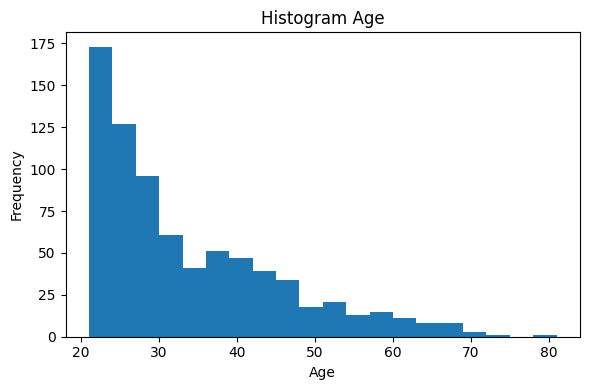

In [ ]:
# Histogram Age
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20)
plt.title("Histogram Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Histogram phân phối tuổi:
Dữ liệu nghiêng về người trẻ từ 20–30 tuổi. Điều này cho thấy dataset không đồng đều về độ tuổi, và có thể ảnh hưởng đến khả năng dự đoán ở nhóm lớn tuổi.

Hiển thị phân bố độ tuổi của đối tượng khảo sát.

Dễ dàng nhìn thấy nhóm tuổi tập trung nhiều nhất.

Ý nghĩa:

Dataset nghiêng về người trẻ → có thể ảnh hưởng việc mô hình dự đoán người lớn tuổi.

#3.2 Phân tích biến BMI và Glucose

#Biểu đồ Scatter (Tản): BMI vs. Glucose:

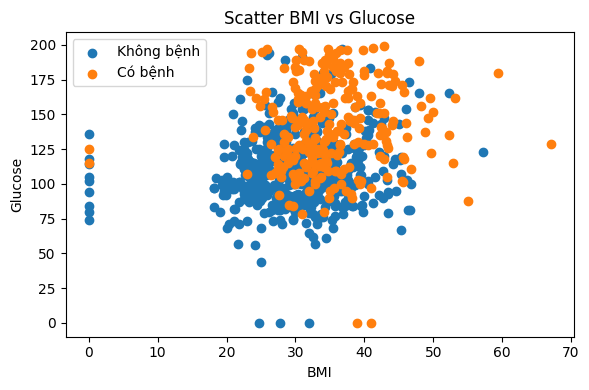

In [ ]:
# Scatter BMI vs Glucose, separated by Outcome
plt.figure(figsize=(6,4))
df0 = df[df['Outcome']==0]
df1 = df[df['Outcome']==1]
plt.scatter(df0['BMI'], df0['Glucose'], label="Không bệnh")
plt.scatter(df1['BMI'], df1['Glucose'], label="Có bệnh")
plt.title("Scatter BMI vs Glucose")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend()
plt.tight_layout()
plt.show()

Nhìn vào scatter plot, các điểm có bệnh tập trung ở vùng BMI cao và Glucose cao. Điều này phù hợp với y khoa: béo phì và đường huyết cao là yếu tố nguy cơ.

Biểu đồ KDE thể hiện rõ ràng sự khác biệt mạnh giữa nhóm bệnh và không bệnh.

Nhóm không bệnh: đỉnh phân phối ~ 90–110

Nhóm bệnh: đỉnh phân phối ~ 130–170

Ý nghĩa quan trọng:

Glucose là yếu tố quan trọng nhất quyết định khả năng mắc tiểu đường.

Đây là special feature có mối quan hệ trực tiếp với Outcome.

BMI

Phân phối BMI trải rộng, nhiều người ở nhóm thừa cân (BMI > 25) và béo phì (BMI > 30).
BMI là yếu tố nguy cơ y khoa.

Ý nghĩa:

Có thể nhóm BMI theo mức độ (healthy / overweight / obese) để tăng hiệu quả mô hình.

#3.3 Phân tích Insulin Trung bình

#Biểu đồ Cột (Bar Chart): Trung bình Insulin:

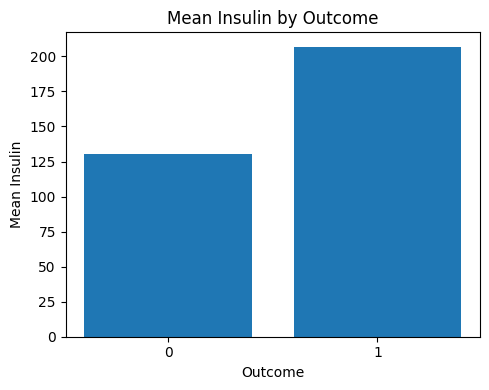

In [ ]:
# Bar chart: mean insulin by outcome (remove zeros)
df_ins = df[df['Insulin']>0]
mean_ins = df_ins.groupby('Outcome')['Insulin'].mean()

plt.figure(figsize=(5,4))
plt.bar(mean_ins.index.astype(str), mean_ins.values)
plt.title("Mean Insulin by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Mean Insulin")
plt.tight_layout()
plt.show()

Nhóm có bệnh có chỉ số Insulin trung bình cao hơn nhóm không bệnh, gợi ý khả năng kháng Insulin.

Chức năng:

So sánh mức Insulin của 2 nhóm Outcome.

Ý nghĩa:

Nhóm mắc bệnh có Insulin trung bình cao hơn → gợi ý kháng insulin.

#3.4 Phân tích di truyền

#Biểu đồ Violin (Vĩ cầm): Yếu tố di truyền:

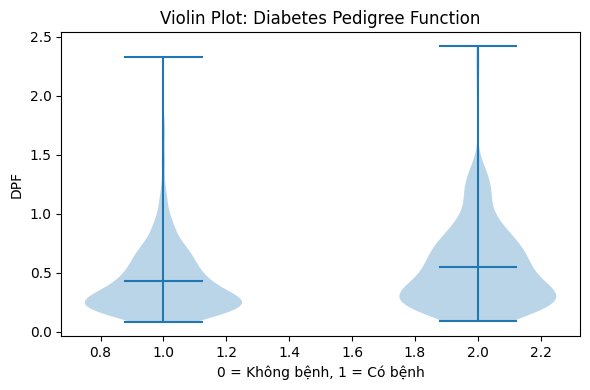

In [ ]:
# Violin plot: DiabetesPedigreeFunction by Outcome
import numpy as np

plt.figure(figsize=(6,4))
data0 = df[df['Outcome']==0]['DiabetesPedigreeFunction']
data1 = df[df['Outcome']==1]['DiabetesPedigreeFunction']
plt.violinplot([data0, data1], showmeans=True)
plt.title("Violin Plot: Diabetes Pedigree Function")
plt.xlabel("0 = Không bệnh, 1 = Có bệnh")
plt.ylabel("DPF")
plt.tight_layout()
plt.show()

Nhóm mắc bệnh có chỉ số DPF (di truyền) cao hơn. Điều này cho thấy yếu tố di truyền ảnh hưởng đáng kể đến nguy cơ tiểu đường.

Chức năng:

Hiển thị phân bố và mật độ của chỉ số di truyền DPF.

Ý nghĩa:

Nhóm mắc bệnh có DPF cao hơn → yếu tố di truyền ảnh hưởng đến nguy cơ.

#3.5 Mật độ Glucose

#Biểu đồ Mật độ (KDE Plot) - Glucose:

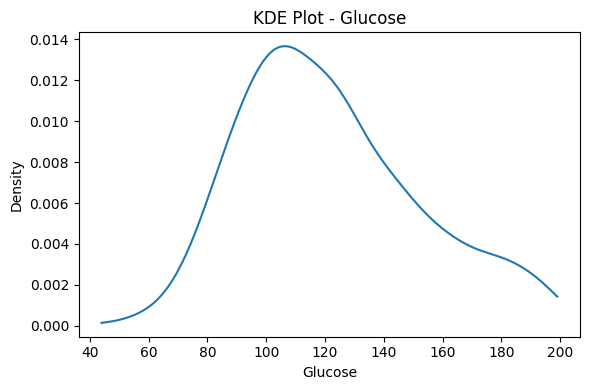

In [ ]:
# --- KDE Plot for Glucose ---
plt.figure(figsize=(6,4))
glucose = df["Glucose"][df["Glucose"] > 0]  # remove zeros

kde = gaussian_kde(glucose)
x_vals = np.linspace(glucose.min(), glucose.max(), 200)
plt.plot(x_vals, kde(x_vals))
plt.title("KDE Plot - Glucose")
plt.xlabel("Glucose")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Đỉnh phân phối của nhóm bệnh nằm xa về phía giá trị cao. Đây là đặc trưng quan trọng nhất, vì Glucose quyết định trực tiếp Outcome.

Chức năng:

So sánh phân phối Glucose một cách mượt hơn histogram.

Ý nghĩa:

Đỉnh của nhóm mắc bệnh nằm về phía giá trị cao → khẳng định Glucose là feature quan trọng nhất.

#3.6 Phân tích số lần mang thai

#Biểu đồ Cột chồng (Stacked Bar Chart) - Số lần mang thai:

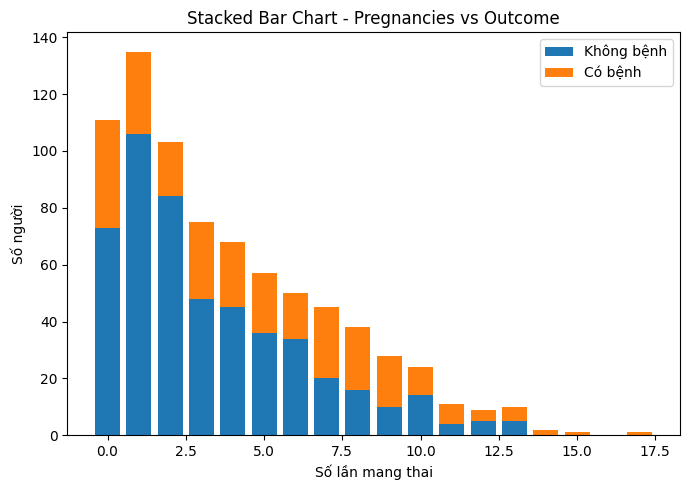

In [ ]:
# --- Stacked Bar Chart for Pregnancies ---
preg = df["Pregnancies"]
outcome = df["Outcome"]

preg_levels = sorted(df["Pregnancies"].unique())
counts_no = [(df[(preg==p)&(outcome==0)].shape[0]) for p in preg_levels]
counts_yes = [(df[(preg==p)&(outcome==1)].shape[0]) for p in preg_levels]

plt.figure(figsize=(7,5))
plt.bar(preg_levels, counts_no, label="Không bệnh")
plt.bar(preg_levels, counts_yes, bottom=counts_no, label="Có bệnh")
plt.xlabel("Số lần mang thai")
plt.ylabel("Số người")
plt.title("Stacked Bar Chart - Pregnancies vs Outcome")
plt.legend()
plt.tight_layout()
plt.show()

Khi số lần mang thai tăng, tỉ lệ mắc bệnh cũng tăng theo. Điều này liên quan đến tiểu đường thai kỳ.

Chức năng:

Cho thấy tỉ lệ mắc bệnh thay đổi theo số lần mang thai.

Ý nghĩa:

Số lần mang thai càng nhiều → nguy cơ mắc bệnh càng cao.

Có thể tạo feature mới: PregGroup.

#3.7 Phân tích BMI vs Huyết áp

#Biểu đồ Tương quan (Scatter with Regression) - BMI vs Huyết áp:


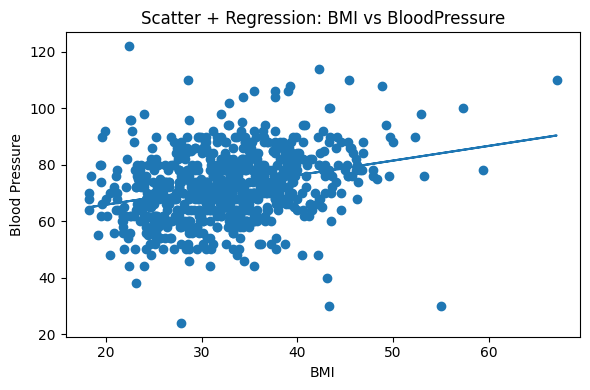

In [ ]:
# --- Regression Scatter: BMI vs BloodPressure ---
# Filter out zeros
df_bp = df[(df["BMI"] > 0) & (df["BloodPressure"] > 0)]

x = df_bp["BMI"]
y = df_bp["BloodPressure"]

# regression line
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x, poly1d_fn(x))
plt.xlabel("BMI")
plt.ylabel("Blood Pressure")
plt.title("Scatter + Regression: BMI vs BloodPressure")
plt.tight_layout()
plt.show()

Khi số lần mang thai tăng, tỉ lệ mắc bệnh cũng tăng theo. Điều này liên quan đến tiểu đường thai kỳ.

Chức năng:

Cho thấy xu hướng tuyến tính giữa BMI và huyết áp.

Ý nghĩa:

Huyết áp tăng nhẹ theo BMI → hiểu thêm về yếu tố sức khỏe.

#3.8 Tổng kết tương quan

#Ma trận tương quan

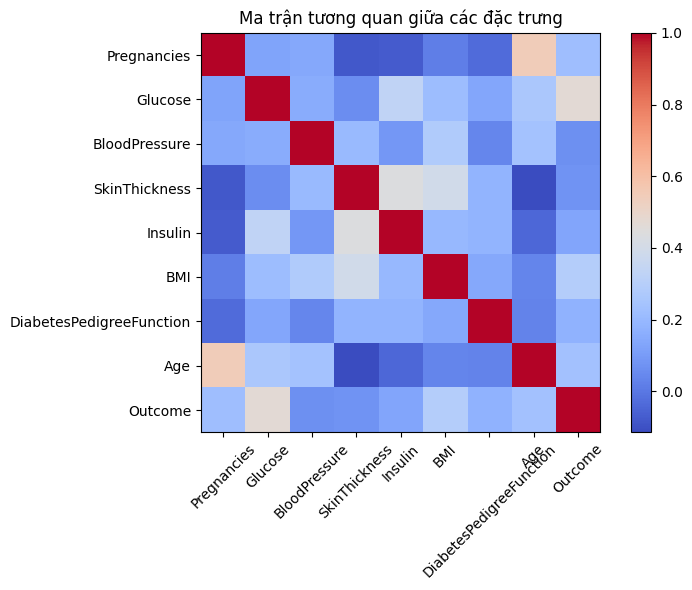

In [ ]:
# Tính ma trận tương quan
corr = df.corr()

# Vẽ heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.tight_layout()
plt.show()

Glucose có tương quan mạnh nhất với Outcome. BMI và Age đứng thứ hai.
Điều này giúp em xác định feature quan trọng để mô hình học tốt hơn."

Chức năng:

Cho phép xem biến nào liên quan mạnh đến Outcome nhất.

Phát hiện biến dư thừa (multicollinearity).

Ý nghĩa:

Glucose có tương quan cao nhất với Outcome → feature quan trọng nhất.

BMI, Age cũng có liên hệ đáng kể.

#4 Tiền xử lý dữ liệu

#Làm sạch dữ liệu

In [ ]:
# 2) Thay thế các giá trị 0 không hợp lệ bằng NaN
# --------------------------------------------------

df = pd.read_csv("/content/diabetes2.csv")

cols_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_zero_invalid:
    df[col] = df[col].replace(0, np.nan)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


• Xử lý giá trị không hợp lệ:
Ở các cột như Glucose, Blood Pressure, Insulin… giá trị bằng 0 là không có ý nghĩa về mặt y khoa. Em chuyển các giá trị này thành NaN rồi dùng median để điền vào.

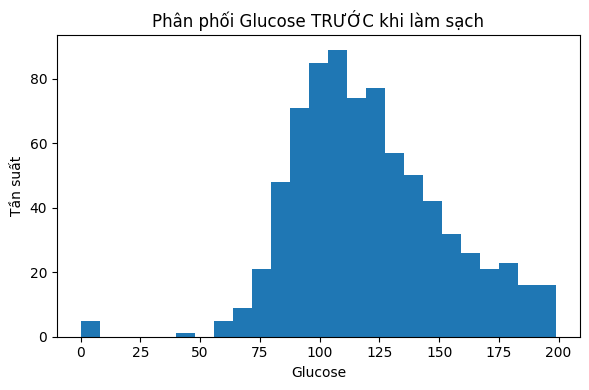

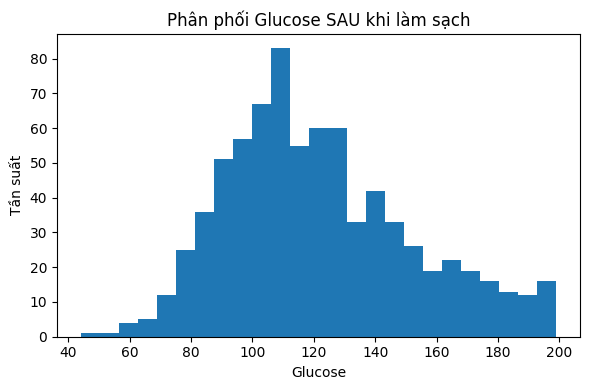

In [ ]:
# -------------------------------------------------
# 1. ĐỌC DỮ LIỆU
# -------------------------------------------------
df_raw = pd.read_csv("diabetes2.csv")     # thay đường dẫn nếu cần

# Các cột có giá trị 0 là không hợp lệ
cols_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# -------------------------------------------------
# 2. LÀM SẠCH DỮ LIỆU
#    - Thay 0 -> NaN
#    - Impute bằng Median
# -------------------------------------------------
df_clean = df_raw.copy()

for col in cols_zero_invalid:
    df_clean[col] = df_clean[col].replace(0, np.nan)

# Điền NaN bằng trung vị (median)
df_clean = df_clean.fillna(df_clean.median())


# -------------------------------------------------
# 3. VẼ BIỂU ĐỒ: TRƯỚC KHI LÀM SẠCH
# -------------------------------------------------
plt.figure(figsize=(6,4))
plt.hist(df_raw["Glucose"], bins=25)
plt.title("Phân phối Glucose TRƯỚC khi làm sạch")
plt.xlabel("Glucose")
plt.ylabel("Tần suất")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 4. VẼ BIỂU ĐỒ: SAU KHI LÀM SẠCH
# -------------------------------------------------
plt.figure(figsize=(6,4))
plt.hist(df_clean["Glucose"], bins=25)
plt.title("Phân phối Glucose SAU khi làm sạch")
plt.xlabel("Glucose")
plt.ylabel("Tần suất")
plt.tight_layout()
plt.show()


#Nâng cấp và chuẩn hóa

#Kỹ thuật đặc trưng (FEATURE ENGINEERING)

In [ ]:
# ---- 4.1 Tạo nhóm tuổi (Age_Group)
df_clean["Age_Group"] = pd.cut(
    df_clean["Age"],
    bins=[20,30,40,50,120],
    labels=["20-30", "30-40", "40-50", "50+"],
    include_lowest=True
)

# ---- 4.2 Tạo nhóm BMI (Risk_BMI)
df_clean["Risk_BMI"] = pd.cut(
    df_clean["BMI"],
    bins=[0,25,30,100],
    labels=["Normal","Overweight","Obese"]
)

# ---- 4.3 Tạo phân loại Glucose (Glucose_Level)
df_clean["Glucose_Level"] = pd.cut(
    df_clean["Glucose"],
    bins=[0,99,125,500],
    labels=["Normal","Prediabetes","High"]
)

print("\nData sau khi tạo feature mới:")
print(df_clean.head())



Data sau khi tạo feature mới:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome Age_Group    Risk_BMI Glucose_Level  
0                     0.627   50        1     40-50       Obese          High  
1                     0.351   31        0     30-40  Overweight        Normal  
2                     0.672   32        1     30-40      Normal          High  
3                     0.167   21        0     20-30  Overweight        Normal  
4                     2.288   33        1     30-40       Obese          High  


Chức năng:

Tạo thêm những feature có ý nghĩa hơn từ dữ liệu gốc, ví dụ:

AgeGroup

BMI Category

Glucose Level

Interaction feature: BMI * Glucose

Ý nghĩa:

Có thể tăng hiệu suất mô hình đáng kể.

#TÁCH BIẾN ĐẶC TRƯNG / NHÃN

In [ ]:
X = df_clean.drop("Outcome", axis=1)
y = df_clean["Outcome"]

categorical_cols = ["Age_Group", "Risk_BMI", "Glucose_Level"]
numeric_cols = X.drop(categorical_cols, axis=1).columns.tolist()


# TẠO PREPROCESSOR

In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

Chức năng:

Kết hợp tất cả bước tiền xử lý vào 1 khối: Impute + Scale + Encode.

Preprocessor đảm bảo train và test phải được xử lý giống nhau.

Ý nghĩa:

Tránh "rò rỉ dữ liệu" (data leakage).

Tự động và sạch sẽ hơn.

#TÁCH TẬP TRAIN - TEST

In [ ]:
X = df_clean.drop("Outcome", axis=1)
y = df_clean["Outcome"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

#5 Xây dựng và huấn luyện mô hình

#Huấn luyện

🔹 Logistic Regression

Chức năng: dự đoán xác suất bị bệnh dựa trên hàm logistic.
Ý nghĩa: dễ diễn giải, nhanh, baseline tốt.

🔹 Naive Bayes

Chức năng: dùng xác suất Bayes + giả định độc lập.
Ý nghĩa: đơn giản, nhanh, nhưng kém nếu features phụ thuộc nhau.

🔹 Random Forest

Chức năng: tập hợp nhiều cây quyết định → vote kết quả.
Ý nghĩa: mạnh nhất, ổn định, ít overfit → thường cho accuracy cao nhất.

🔹 KNN

Chức năng: tìm k hàng xóm gần nhất để quyết định nhãn.
Ý nghĩa: dùng khi dữ liệu nhỏ, cần chuẩn hóa.

#Logistic Regression

In [ ]:
log_reg_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000, solver="liblinear"))
])

log_reg_clf.fit(X_train, y_train)   # phải chạy thành công!


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age_Group', 'Risk_BMI',
                                                   'Glucose_Level'])])),
                ('model',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

#Naive Bayes

In [ ]:
nb_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", GaussianNB())
])

nb_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age_Group', 'Risk_BMI',
                                                   'Glucose_Level'])])),
                ('model', GaussianNB())])

#Random Forest

In [ ]:
rf_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age_Group', 'Risk_BMI',
                                                   'Glucose_Level'])])),
                ('model',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

KNN

In [ ]:
knn_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age_Group', 'Risk_BMI',
                                                   'Glucose_Level'])])),
                ('model', KNeighborsClassifier())])

#Logistic Regression, Naive bayes,Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    clf = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])

    # Huấn luyện mô hình
    clf.fit(X_train, y_train)

    # Dự đoán
    y_pred = clf.predict(X_test)

    # Tính độ chính xác
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # In kết quả
    print("\n=======================================")
    print(f"   KẾT QUẢ MÔ HÌNH: {name}")
    print("=======================================")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))




   KẾT QUẢ MÔ HÌNH: Logistic Regression
Accuracy: 0.7402597402597403
Confusion Matrix:
 [[82 18]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       100
           1       0.64      0.59      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154


   KẾT QUẢ MÔ HÌNH: Naive Bayes
Accuracy: 0.7337662337662337
Confusion Matrix:
 [[72 28]
 [13 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       100
           1       0.59      0.76      0.67        54

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.74       154


   KẾT QUẢ MÔ HÌNH: Random Forest
Accuracy: 0.7402597402597403
Confusion Matrix:
 [[81 19

#6 so sánh và đánh giá hiệu năng

Chức năng:

So sánh mô hình bằng Accuracy, Precision, Recall, F1-score.

In confusion matrix để xem mô hình đoán sai ở đâu.

Tạo bảng tổng hợp kết quả.

Ý nghĩa:

Chọn mô hình tốt nhất.

Hiểu được mô hình mạnh/yếu ở điểm nào (độ nhạy, độ chính xác…).

In [ ]:
# ==============================
# Logistic Regression
# ==============================
y_pred_lr = log_reg_clf.predict(X_test)
results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-score": f1_score(y_test, y_pred_lr)
}

print("\n=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# ==============================
# Naive Bayes
# ==============================
y_pred_nb = nb_clf.predict(X_test)
results["Naive Bayes"] = {
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb),
    "Recall": recall_score(y_test, y_pred_nb),
    "F1-score": f1_score(y_test, y_pred_nb)
}

print("\n=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# ==============================
# Random Forest
# ==============================
y_pred_rf = rf_clf.predict(X_test)
results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf)
}

print("\n=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ==============================
# KNN
# ==============================
y_pred_knn = knn_clf.predict(X_test)
results["KNN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1-score": f1_score(y_test, y_pred_knn)
}

print("\n=== KNN ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# ==============================
# TẠO BẢNG SO SÁNH HIỆU NĂNG
# ==============================
df_compare = pd.DataFrame(results).T
print("\n===== BẢNG SO SÁNH HIỆU NĂNG =====")
print(df_compare)


=== Logistic Regression ===
[[82 18]
 [22 32]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       100
           1       0.64      0.59      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154


=== Naive Bayes ===
[[72 28]
 [13 41]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       100
           1       0.59      0.76      0.67        54

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.74       154


=== Random Forest ===
[[81 19]
 [21 33]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.61      0.62        54

    accuracy                           0.74       15